# Research Question 3 - Attention Weight and Path Type

The project assumes that the deep-learning system would prefer more rational reasoning - prefer human-like reasoning paths over automatically generated ones. This analysis aims to verify the validity of this assumption.

Since this investigation, unlike [Research Question 1](Research%20Question%201.ipynb) and [Research Question 2](Research%20Question%202.ipynb), involves two distinct types of human-like reasoning paths generated either by a human or the COMET system, we will not be able to mix the two sets of experiments.

In [1]:
import pickle

with open("data/human.pkl", "rb") as human, open("data/comet.pkl", "rb") as comet:
    human_experiments = pickle.load(human)
    comet_experiments = pickle.load(comet)
    
print(f"Total number of human experiments: {len(human_experiments)}")
print(f"Total number of comet experiments: {len(comet_experiments)}")

Total number of human experiments: 7
Total number of comet experiments: 16


## Analysis on Attention Weight

Based on [Research Question 2](Research%20Question%202.ipynb), the attention weight of a path can be used as an indication of the deep-learning model's belief in the quality of the reasoning path - higher attention weight implies better path quality. Similar to [Research Question 2](Research%20Question%202.ipynb), we will use the attention weights from instances where all reasoning paths are supplied.

In [2]:
import pandas as pd

human_attentions = pd.DataFrame(
    [(e.story, e.sentence, e.character, i.human_size, i.machine_size, "human", p.content, p.weight)
     for e in human_experiments for i in e.instances for s in i.samples for p in s.human_paths] +
    [(e.story, e.sentence, e.character, i.human_size, i.machine_size, "machine", p.content, p.weight)
     for e in human_experiments for i in e.instances for s in i.samples for p in s.machine_paths],
    columns=("story", "line", "character", "human_size", "machine_size", "source", "path", "value")
)

human_attentions = human_attentions.groupby(["story", "line", "character"])\
    .apply(lambda x: x[(x.human_size == x.human_size.max()) & (x.machine_size == x.machine_size.max())])\
    .reset_index(drop=True)[["story", "line", "character", "source", "path", "value"]]

human_attentions

,story,line,character,source,path,value
0,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,human,When a person shows gratitude to the other per...,1.600138e-14
1,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,human,Gina received a bracelet from May which is a t...,1.834524e-16
2,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,human,The object is ugly but a person still pretends...,2.966596e-13
3,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,human,The object is ugly but a person still pretends...,3.174082e-15
4,0428b530-0cec-4955-b023-0bac60ddf8cc,5,Gina,human,Gina received a bracelet from May which is a t...,2.966596e-13
...,...,...,...,...,...,...
47395,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),machine,power related to motor related to go,2.237051e-02
47396,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),machine,home related to love,1.236910e-06
47397,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),machine,go_home related to eliminate related to elimin...,3.862783e-04
47398,061a896e-12bb-4f3a-a8ec-7e4188228ac9,5,I (myself),machine,belong related to fit_in related to social,2.222574e-02


In [3]:
comet_attentions = pd.DataFrame(
    [(e.story, e.sentence, e.character, i.human_size, i.machine_size, "comet", p.content, p.weight)
     for e in comet_experiments for i in e.instances for s in i.samples for p in s.human_paths] +
    [(e.story, e.sentence, e.character, i.human_size, i.machine_size, "machine", p.content, p.weight)
     for e in comet_experiments for i in e.instances for s in i.samples for p in s.machine_paths],
    columns=("story", "line", "character", "human_size", "machine_size", "source", "path", "value")
)

comet_attentions = comet_attentions.groupby(["story", "line", "character"])\
    .apply(lambda x: x[(x.human_size == x.human_size.max()) & (x.machine_size == x.machine_size.max())])\
    .reset_index(drop=True)[["story", "line", "character", "source", "path", "value"]]

comet_attentions

,story,line,character,source,path,value
0,171c3ca6-1515-4853-b252-998066f3ceb6,1,Meredith,comet,Party is the opposite of evening. Relaxing is ...,6.377374e-25
1,171c3ca6-1515-4853-b252-998066f3ceb6,1,Meredith,comet,Party is the opposite of boredom. Boredom make...,1.041239e-28
2,171c3ca6-1515-4853-b252-998066f3ceb6,1,Meredith,comet,Party is the opposite of boredom. Boredom make...,3.877809e-25
3,171c3ca6-1515-4853-b252-998066f3ceb6,1,Meredith,comet,Party is the opposite of evening. Relaxing is ...,6.377374e-25
4,171c3ca6-1515-4853-b252-998066f3ceb6,1,Meredith,comet,Party is the opposite of boredom. Boredom make...,1.041239e-28
...,...,...,...,...,...,...
104995,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,machine,belonging related to family Synonym class,3.582870e-11
104996,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,machine,class related to status,2.057840e-02
104997,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,machine,good related to praise is a approval,2.030006e-08
104998,b33a2445-7421-4ace-9837-e8f165524ccf,3,Riley,machine,drop related to soup Antonym food,6.252807e-02


Since the normal distribution assumption cannot be satisfied, the Wilcoxon Signed-Rank Test will be used to compare the population means of attention weights of the two types of reasoning paths. Based on the assumption, one would expect that human-like reasoning paths would receive higher attention weights than that of the system-generated ones.

In [4]:
from scipy import stats

human_results = human_attentions.groupby(["story", "line", "character"])\
    .apply(lambda x: stats.mannwhitneyu(x[x.source=="machine"].value,
                                        x[x.source=="human"].value,
                                        alternative="greater").pvalue)

human_results < 0.01

story                                 line  character  
0428b530-0cec-4955-b023-0bac60ddf8cc  5     Gina           True
0463f79e-2d83-44b7-ad1f-5bcb3f5fd947  3     Finn           True
                                      4     Finn           True
047a5159-6595-4ec2-b7e6-2807b5f0fc78  1     Gary           True
                                      2     Gary           True
05c4681d-f365-438b-8509-58461afb2935  5     A small boy    True
061a896e-12bb-4f3a-a8ec-7e4188228ac9  5     I (myself)     True
dtype: bool

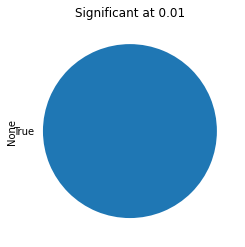

In [5]:
(human_results < 0.01).value_counts(normalize=True).plot.pie(title="Significant at 0.01")

In [6]:
comet_results = comet_attentions.groupby(["story", "line", "character"])\
    .apply(lambda x: stats.mannwhitneyu(x[x.source=="machine"].value,
                                        x[x.source=="comet"].value,
                                        alternative="greater").pvalue)

comet_results < 0.01

story                                 line  character   
171c3ca6-1515-4853-b252-998066f3ceb6  1     Meredith         True
                                      2     Meredith        False
                                      3     Meredith        False
                                      5     Meredith         True
1de18db6-1956-4ea4-8cba-d3147783c6dc  3     Girls            True
                                            Neighborhood     True
                                            Rick             True
5a49eb64-7560-4d40-a9c6-9f5ea7dce513  4     Valerie         False
7a45afb8-18c4-4397-8751-6d8332d88178  1     Tycho           False
                                      3     Tycho           False
                                      4     Doctor          False
                                            Tycho           False
                                      5     Tycho           False
a3e66276-ef27-426f-8a2f-329779f17038  1     Cook            False
                   

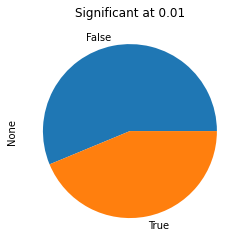

In [7]:
(comet_results < 0.01).value_counts(normalize=True).plot.pie(title="Significant at 0.01")

## Conclusion

Test results suggest that the deep-learning model fully recognizes human-generated reasoning paths as higher quality; however, it only believes a minority of COMET-generated ones are reasonable. In this experiment, a reasoning path's syntax and semantic measure its human-likeness; this result suggests that the deep-learning model values the content of a path more than its form. Therefore, future system designs should primarily focus on ensuring the quality, in terms of reasonability, of the reasoning paths rather than their grammatical structure - a simple template-based system should suffice if it encourages rational connections of concepts.